# Installation

In [1]:
!git clone https://github.com/chrizandr/move_it

Cloning into 'move_it'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 82 (delta 42), reused 59 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (82/82), 167.42 KiB | 7.61 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [2]:
%cd /content/move_it
!pip install -q -r requirements.txt

/content/move_it
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.8/79.8 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 216.9 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 54.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.7/254.7 kB 16.6 MB/s eta 0:00:00


### Run `configure.py` to download the relevant model checkpoints and create configs.

In [3]:
!python configure.py

Downlading from https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth....
/content/move_it/weights/groundingdino_swint_ogc.pth: 100% 662M/662M [00:14<00:00, 48.0MB/s]
Downlading from https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth....
/content/move_it/weights/sam_vit_h_4b8939.pth: 100% 2.39G/2.39G [00:34<00:00, 73.9MB/s]
Downlading from https://raw.githubusercontent.com/chrizandr/GroundingDINO/main/groundingdino/config/GroundingDINO_SwinT_OGC.py....
/content/move_it/configs/GroundingDINO_SwinT_OGC.py: 0.98kB [00:00, 4.09MB/s]     


# Model Loading



### Import the configurations

In [4]:
import os
import json

HOME = os.getcwd()
try:
    segmentation_config = json.load(
        open(f"{HOME}/configs/segmentation_config.json"))
    inpainting_config = json.load(
        open(f"{HOME}/configs/inpainting_config.json"))
except FileNotFoundError:
    print("Cannot find config file, please run configure.py")

### Set the device

In [5]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

### Load the pipeline, which includes 3 different models (DINO, SAM, Stable-Diffusion)

In [6]:
from move_it.pipelines import InpaintingPipeline

model = InpaintingPipeline(segmentation_config, inpainting_config, device)

final text_encoder_type: bert-base-uncased


The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/544 [00:00<?, ?B/s]

Fetching 13 files:   0%|          | 0/13 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/1.36G [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/638 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/914 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.46G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

# Testing Segmentation pipeline

We are going to the segmentation pipeline where we segment an object based on a text prompt. Prompt can be open vocabulary.



Wall hanging

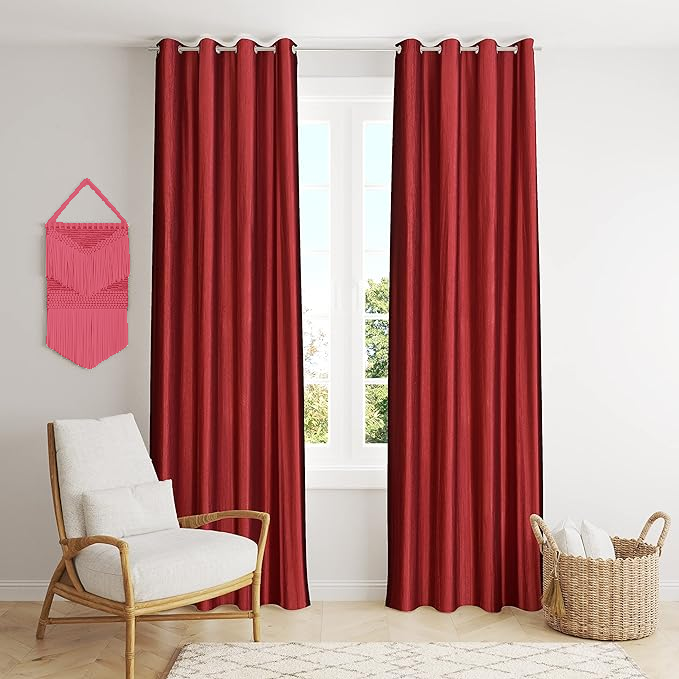

In [7]:
from PIL import Image

model.seg_pipeline.run("/content/move_it/samples/wall hanging.jpg", "wall hanging", "seg_wallhanging.png")
Image.open("seg_wallhanging.png")

Bagpack

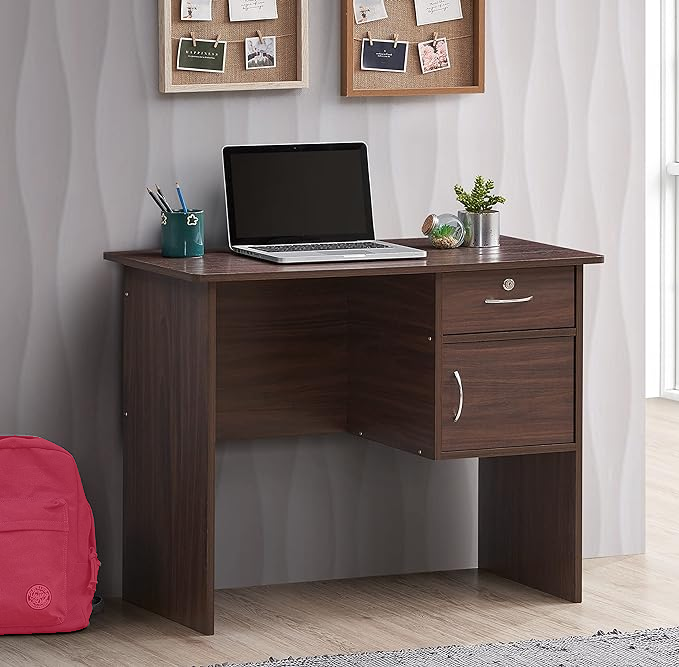

In [8]:
model.seg_pipeline.run("/content/move_it/samples/bagpack.jpg", "bagpack", "seg_bagpack.png")
Image.open("seg_bagpack.png")

Stool

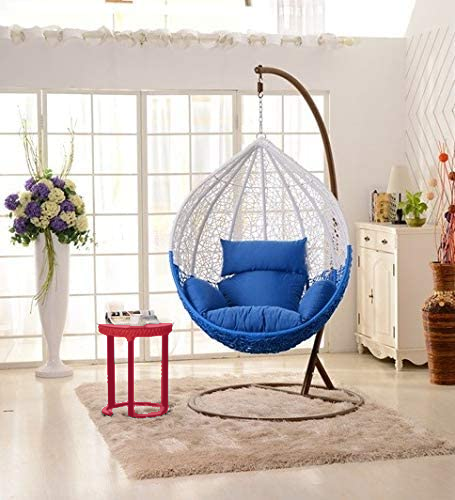

In [9]:
model.seg_pipeline.run("/content/move_it/samples/stool.jpeg", "stool", "seg_stool.png")
Image.open("seg_stool.png")

### Since the model used are open-vocabulary, we can use alternate prompts for the same objects and still segment them

"wall decoration" instead of "wall hanging"

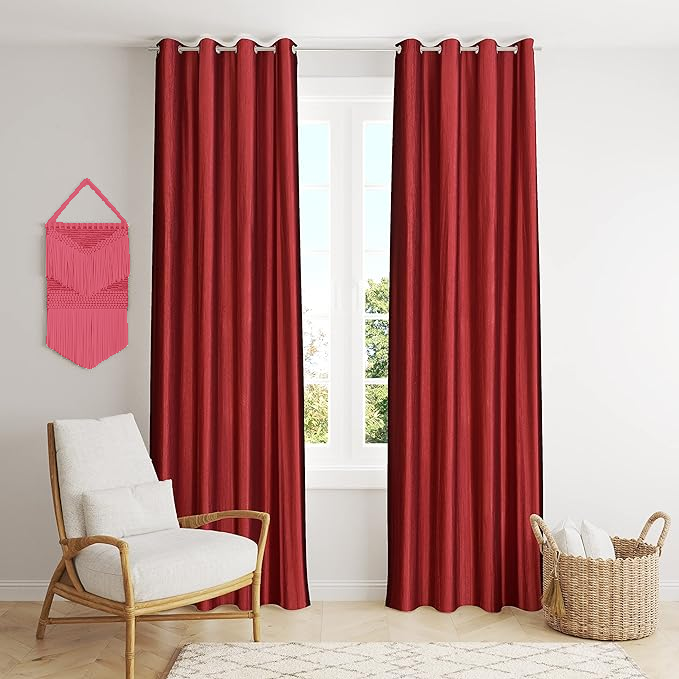

In [10]:
model.seg_pipeline.run("/content/move_it/samples/wall hanging.jpg", "wall decoration", "seg_wallhanging_alt.png")
Image.open("seg_wallhanging_alt.png")

"School bag" instead of "bagpack"

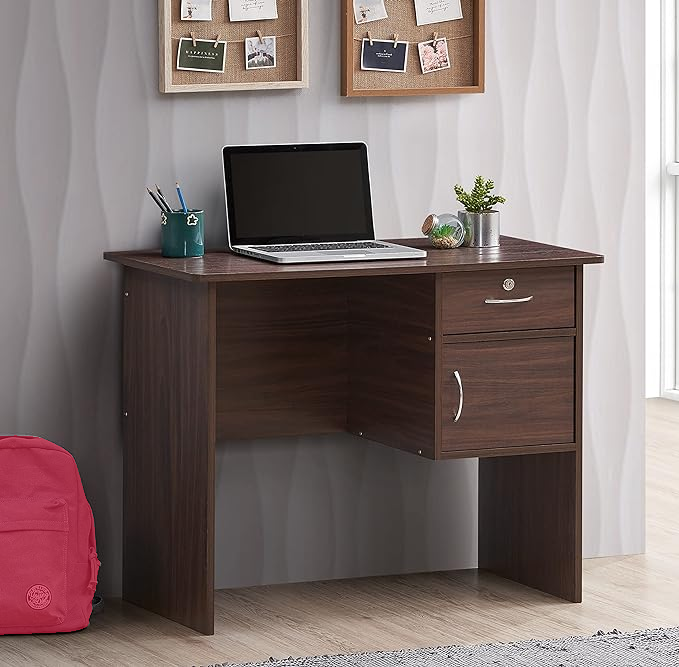

In [13]:
model.seg_pipeline.run("/content/move_it/samples/bagpack.jpg", "school bag", "seg_bagpack_alt.png")
Image.open("seg_bagpack_alt.png")

"side table" instead of "stool"

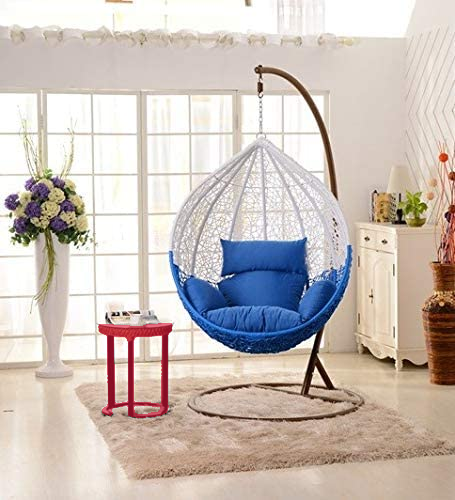

In [15]:
model.seg_pipeline.run("/content/move_it/samples/stool.jpeg", "side table", "seg_stool_alt.png")
Image.open("seg_stool_alt.png")

### We can also segment other objects in the image

Laptop

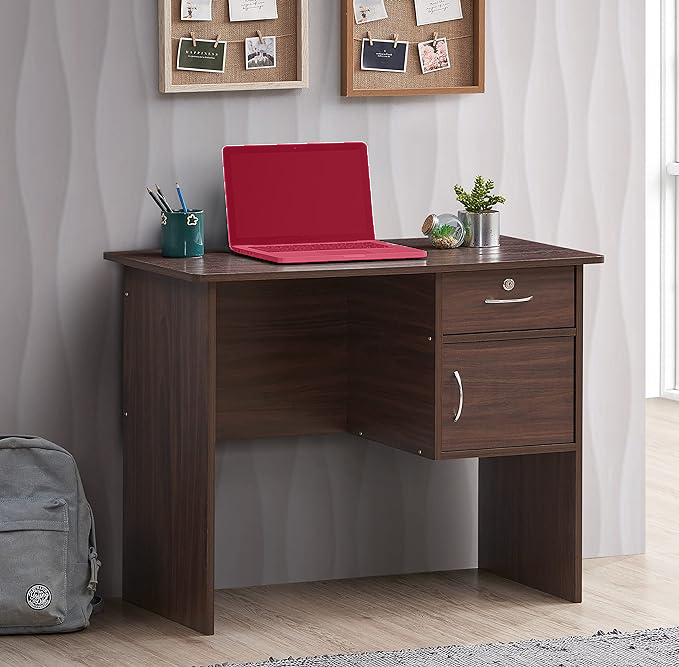

In [16]:
model.seg_pipeline.run("/content/move_it/samples/bagpack.jpg", "laptop", "seg_laptop_alt.png")
Image.open("seg_laptop_alt.png")

# Testing Inpainting pipeline

We are now going to test the inpainting pipeline where we segment an object based on a text prompt, move it to a different location and inpaint the gap left by the object.



NOTE: Images may be different in every run, to maintain consistency sample a latent vector with a fixed random seed and pass that during inference to the model.

Move bagpack under the table

  0%|          | 0/50 [00:00<?, ?it/s]

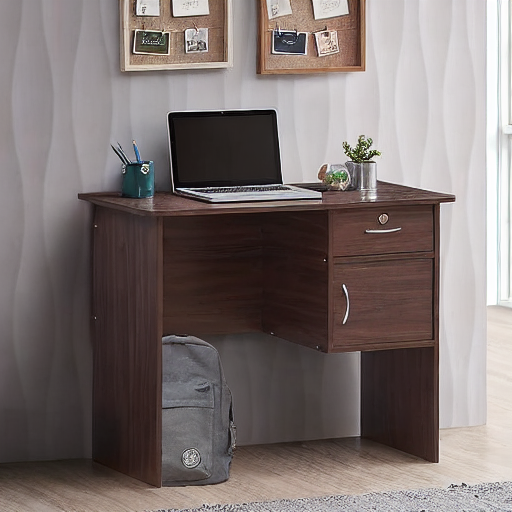

In [15]:
model.run("/content/move_it/samples/bagpack.jpg", "bagpack", (0, 215), "move_bagpack_1.png")
Image.open("move_bagpack_1.png")

Move wall hanging to opposite wall

  0%|          | 0/50 [00:00<?, ?it/s]

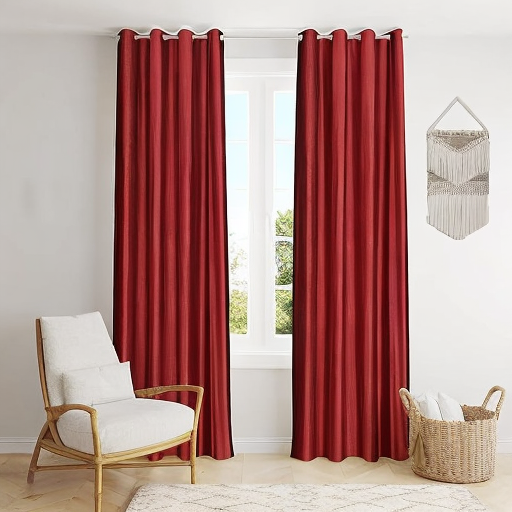

In [13]:
model.run("/content/move_it/samples/wall hanging.jpg", "wall hanging", (-50, 520), "move_wallhanging_1.png")
Image.open("move_wallhanging_1.png")

Move the stool off the carpet

  0%|          | 0/50 [00:00<?, ?it/s]

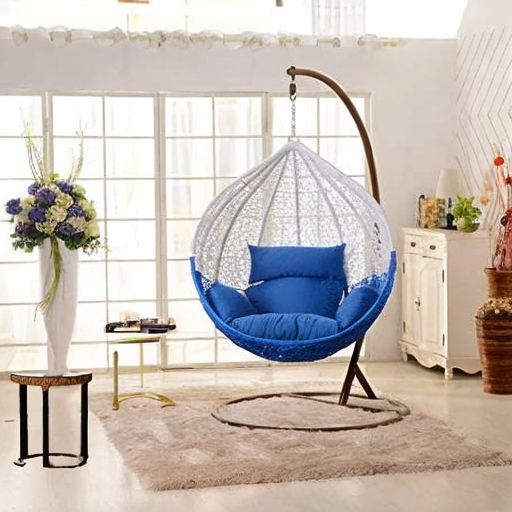

In [16]:
model.run("/content/move_it/samples/stool.jpeg", "stool", (40, -90), "move_stool_1.png")
Image.open("move_stool_1.png")

It should be noted that the inpainting model does sometimes generate arfitacts that are not asked for. The standard prompt given for inpainting is to generate background in the masked region (rectangular box where the object was moved from). However, the model does not always follow the instructions, especially in cases where the background is complex. Newer models have come out that better follow input prompts, but these come at the cost of higher computational resources. Another interesting approach might be the segmentation pipeline to segment different parts of the background and use those separately to inpaint the object mask.